<a href="https://colab.research.google.com/github/mandimarquardt/DataMining/blob/main/CIFAR_10_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The CIFAR-10 dataset

The following is from [Alex Frizhevsky's description](https://www.cs.toronto.edu/~kriz/cifar.html) of the dataset.

The CIFAR-10 and CIFAR-100 are labeled subsets of the [80 million tiny images](http://people.csail.mit.edu/torralba/tinyimages/) dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.



The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

![](https://github.com/mjpoulsen/ml-class/blob/labs/pics/cifar.png?raw=1)

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

### [Download](https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz)

### Discussion

This is similar to the MNIST and clothing datasets. In those the images were 28x28x1. In this one the images are 32x32x3.  Just like MNIST and clothing, this dataset has 10 possible labels.  

I am hoping that you see that this is a slight remix of our work with MNIST and clothing.

This dataset is widely used today for performance testing of new deep learning methods. 

# CIFAR-10 Project

This notebook will explore the CIFAR-10 dataset.

As mentioned in the project description, the dataset contains 60000 32x32 color images. It's made up of in 10 classes, with 6000 images per class.

The dataset splits the images into `train` and `test`.

The `train` set include 50000 images. This project will split the set `40000` train images and `10000` validation images.

The `test` set includes 10000 images. The set includes 1000 images from each class, and has equal representation from each class.

This project is sort of a remix of the MNIST and CNN labs from this class.

Therefore it will create, compile, and fit a Dense Neural Network (DNN) and a Convolutional Neural Network (CNN) using the CIFAR-10 dataset.


Contents:

1.   Import Necessary Libraries
2.   Import the Data
3.   Data Preprocessing
4.   Data Visualization
5.   Base Model - DNN
6.   Convolutional Neural Network (CNN)
7.   Conclusion



## 1) Import Necessary Libraries

### Runtime

Before we import libraries, let's ensure the runtime for this notebook is set to GPU. Without the GPU runtime, the Neural Networks will not run.

If the following command produces a failure, do not proceed until the runtime has been set to GPU.

In [1]:
# Prove this notebook has GPU has the runtime type. If this fails, DNN will not work.
!nvidia-smi

Mon Dec  5 02:35:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import Libraries

This project will utilize various data anaylsis and machine learning Python libraries.



In [2]:
# Data analysis libraries
import numpy as np

# Machine learning libraries
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers

## Define the directories
import os, shutil

# Visualizing data
from IPython.display import Image
import matplotlib.pyplot as plt

## 2) Import the Data


### Download and Unzip

Amazon hosts the CIFAR-10 image class set as a tar. Download and unzip, this may take a few seconds.

In [3]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!tar xvzf cifar10.tgz

Streaming output truncated to the last 5000 lines.
cifar10/test/ship/0489.png
cifar10/test/ship/0295.png
cifar10/test/ship/0430.png
cifar10/test/ship/0973.png
cifar10/test/ship/0438.png
cifar10/test/ship/0794.png
cifar10/test/ship/0634.png
cifar10/test/ship/0783.png
cifar10/test/ship/0012.png
cifar10/test/ship/0933.png
cifar10/test/ship/0195.png
cifar10/test/ship/0781.png
cifar10/test/ship/0189.png
cifar10/test/ship/0891.png
cifar10/test/ship/0255.png
cifar10/test/ship/0798.png
cifar10/test/ship/0487.png
cifar10/test/ship/0019.png
cifar10/test/ship/0078.png
cifar10/test/ship/0623.png
cifar10/test/ship/0100.png
cifar10/test/ship/0826.png
cifar10/test/ship/0163.png
cifar10/test/ship/0755.png
cifar10/test/ship/0303.png
cifar10/test/ship/0302.png
cifar10/test/ship/0706.png
cifar10/test/ship/0940.png
cifar10/test/ship/0607.png
cifar10/test/ship/0048.png
cifar10/test/ship/0676.png
cifar10/test/ship/0363.png
cifar10/test/ship/0175.png
cifar10/test/ship/0091.png
cifar10/test/ship/0625.png
cifa

In [4]:
# Show cifar10's contents.
!ls cifar10/

test  train


Let's look at `train`'s contents before involving Python.

In [5]:
!ls cifar10/train/

airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck


Interesting, it's broken into the 10 classifications:

```
airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
```

Let's take a look at `cat`.

In [6]:
!ls cifar10/train/cat/

0001.png  0626.png  1251.png  1876.png	2501.png  3126.png  3751.png  4376.png
0002.png  0627.png  1252.png  1877.png	2502.png  3127.png  3752.png  4377.png
0003.png  0628.png  1253.png  1878.png	2503.png  3128.png  3753.png  4378.png
0004.png  0629.png  1254.png  1879.png	2504.png  3129.png  3754.png  4379.png
0005.png  0630.png  1255.png  1880.png	2505.png  3130.png  3755.png  4380.png
0006.png  0631.png  1256.png  1881.png	2506.png  3131.png  3756.png  4381.png
0007.png  0632.png  1257.png  1882.png	2507.png  3132.png  3757.png  4382.png
0008.png  0633.png  1258.png  1883.png	2508.png  3133.png  3758.png  4383.png
0009.png  0634.png  1259.png  1884.png	2509.png  3134.png  3759.png  4384.png
0010.png  0635.png  1260.png  1885.png	2510.png  3135.png  3760.png  4385.png
0011.png  0636.png  1261.png  1886.png	2511.png  3136.png  3761.png  4386.png
0012.png  0637.png  1262.png  1887.png	2512.png  3137.png  3762.png  4387.png
0013.png  0638.png  1263.png  1888.png	2513.png  3138.png  3763.

As promised, `5000` images.

## 3) Data Preprocessing



## Directories

Create the directory paths needed to create generators for fitting from directories.

`cifar10_split` will be the top level directory, and contain the `train`, `test`, and `validation` directories.

Similar to the original dataset, the `train`, `test`, and `validation` will contain 10 directories, where each is the name of an image class (see `./cifar10/train` for an example).

#### Define the Paths

In [7]:
# Top level directories
original_base_dir = 'cifar10'
base_dir = 'cifar10_split'

# Second level directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Class level directories

# Train
train_airplane_dir = os.path.join(train_dir, 'airplane')
train_automobile_dir = os.path.join(train_dir, 'automobile')
train_bird_dir = os.path.join(train_dir, 'bird')
train_cat_dir = os.path.join(train_dir, 'cat')
train_deer_dir = os.path.join(train_dir, 'deer')
train_dog_dir = os.path.join(train_dir, 'dog')
train_frog_dir = os.path.join(train_dir, 'frog')
train_horse_dir = os.path.join(train_dir, 'horse')
train_ship_dir = os.path.join(train_dir, 'ship')
train_truck_dir = os.path.join(train_dir, 'truck')

# Validation
validation_airplane_dir = os.path.join(validation_dir, 'airplane')
validation_automobile_dir = os.path.join(validation_dir, 'automobile')
validation_bird_dir = os.path.join(validation_dir, 'bird')
validation_cat_dir = os.path.join(validation_dir, 'cat')
validation_deer_dir = os.path.join(validation_dir, 'deer')
validation_dog_dir = os.path.join(validation_dir, 'dog')
validation_frog_dir = os.path.join(validation_dir, 'frog')
validation_horse_dir = os.path.join(validation_dir, 'horse')
validation_ship_dir = os.path.join(validation_dir, 'ship')
validation_truck_dir = os.path.join(validation_dir, 'truck')

# Test
test_airplane_dir = os.path.join(test_dir, 'airplane')
test_automobile_dir = os.path.join(test_dir, 'automobile')
test_bird_dir = os.path.join(test_dir, 'bird')
test_cat_dir = os.path.join(test_dir, 'cat')
test_deer_dir = os.path.join(test_dir, 'deer')
test_dog_dir = os.path.join(test_dir, 'dog')
test_frog_dir = os.path.join(test_dir, 'frog')
test_horse_dir = os.path.join(test_dir, 'horse')
test_ship_dir = os.path.join(test_dir, 'ship')
test_truck_dir = os.path.join(test_dir, 'truck')

#### Make the Directories

In [8]:
# Make the directories
os.mkdir(base_dir)

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

# Train
os.mkdir(train_airplane_dir)
os.mkdir(train_automobile_dir)
os.mkdir(train_bird_dir)
os.mkdir(train_cat_dir)
os.mkdir(train_deer_dir)
os.mkdir(train_dog_dir)
os.mkdir(train_frog_dir)
os.mkdir(train_horse_dir)
os.mkdir(train_ship_dir)
os.mkdir(train_truck_dir)

# Validation
os.mkdir(validation_airplane_dir)
os.mkdir(validation_automobile_dir)
os.mkdir(validation_bird_dir)
os.mkdir(validation_cat_dir)
os.mkdir(validation_deer_dir)
os.mkdir(validation_dog_dir)
os.mkdir(validation_frog_dir)
os.mkdir(validation_horse_dir)
os.mkdir(validation_ship_dir)
os.mkdir(validation_truck_dir)

# Test
os.mkdir(test_airplane_dir)
os.mkdir(test_automobile_dir)
os.mkdir(test_bird_dir)
os.mkdir(test_cat_dir)
os.mkdir(test_deer_dir)
os.mkdir(test_dog_dir)
os.mkdir(test_frog_dir)
os.mkdir(test_horse_dir)
os.mkdir(test_ship_dir)
os.mkdir(test_truck_dir)

#### Generate the List of Train File Names

In [9]:
# + 1 to ensure the range includes the index 5000 and 
# '5000.png' can be accesed at 5000. This will make the ranges easier to read.
size_train = 5000 + 1

# Init an array of file names, good thing each class has the same name.
fnames_train = [None] * size_train

# To add a bit of randomness to the train and validation directories,
# a series of integer (acting as indices) will be shuffled. Those indicies will
# then be used to create the image file names. The first 4000 files in the 
# fnames_train list will be used for training, and the last 1000 files will be
# used for validation.
# This will hopefully make more sense in the copyFilesTrainFiles cell below.

# Create an array of 1 to size.
random_indices = np.arange(1, size_train, dtype=int)
# Randomly shuffle them.
random_indices = np.random.permutation(random_indices)

# Generate the names
for i in range(1, size_train):
  fname = "%04d.png" % (random_indices[i - 1],)
  fnames_train[i] = fname

# Prove this index exist and a random value with a formatting of XXXX.png
fnames_train[5000]

'0702.png'

#### Define the Method to Copy Train and Validation Files

In [10]:
def copyFilesTrainFiles(src_train_dir, dst_train_dir, dst_validation_dir):
  for i in range(1, size_train):
    fname = fnames_train[i]
    src = os.path.join(original_base_dir, 'train', src_train_dir, fname)
    if i <= 4000:
      dst = os.path.join(dst_train_dir, fname)
    else:
      dst = os.path.join(dst_validation_dir, fname)
    shutil.copyfile(src, dst)

#### Generate the List of Test File Names

In [11]:
# + 1 to ensure the range includes the index 5000 and 
# '1000.png' can be accesed at 1000. This will make the ranges easier to read.
size_test = 1000 + 1

# Init an array of file names, good thing each class has the same name.
fnames_test = [None] * size_test

# Generate the names
for i in range(1, size_test):
  fname = "%04d.png" % (i,)
  fnames_test[i] = fname

# Prove this is 1000.png
fnames_test[1000]

'1000.png'

#### Define the Method to Copy the Test Files

In [12]:
def copyFilesTestFiles(src_train_dir, dst_dir):
  for i in range(1, size_test):
    fname = fnames_test[i]
    src = os.path.join(original_base_dir, 'test', src_train_dir, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)    

#### Copy the Train and Validation Files

In [13]:
copyFilesTrainFiles('airplane', train_airplane_dir, validation_airplane_dir)
copyFilesTrainFiles('automobile', train_automobile_dir, validation_automobile_dir)
copyFilesTrainFiles('bird', train_bird_dir, validation_bird_dir)
copyFilesTrainFiles('cat', train_cat_dir, validation_cat_dir)
copyFilesTrainFiles('deer', train_deer_dir, validation_deer_dir)
copyFilesTrainFiles('dog', train_dog_dir, validation_dog_dir)
copyFilesTrainFiles('frog', train_frog_dir, validation_frog_dir)
copyFilesTrainFiles('horse', train_horse_dir, validation_horse_dir)
copyFilesTrainFiles('ship', train_ship_dir, validation_ship_dir)
copyFilesTrainFiles('truck', train_truck_dir, validation_truck_dir)

#### Prove the Train and Validation Directories Have Contents

In [14]:
!ls cifar10_split/train/cat | wc

   4000    4000   36000


In [15]:
!ls cifar10_split/validation/cat | wc

   1000    1000    9000


#### Copy the Test Files

In [16]:
copyFilesTestFiles('airplane', test_airplane_dir)
copyFilesTestFiles('automobile', test_automobile_dir)
copyFilesTestFiles('bird', test_bird_dir)
copyFilesTestFiles('cat', test_cat_dir)
copyFilesTestFiles('deer', test_deer_dir)
copyFilesTestFiles('dog', test_dog_dir)
copyFilesTestFiles('frog', test_frog_dir)
copyFilesTestFiles('horse', test_horse_dir)
copyFilesTestFiles('ship', test_ship_dir)
copyFilesTestFiles('truck', test_truck_dir)

#### Prove the Test Directory Has Contents

In [17]:
!ls cifar10_split/test/cat | wc

   1000    1000    9000


### Create the Image Data Generators

In [18]:
image_size = 32

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 32x32
        target_size=(image_size, image_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


## 4) Data Visualization

Because the dataset contains images, we can just open and look at a few. Keep in mind, the dataset contains images that are 32x32; so the images are small. Therefore, the images will be stretched a bit for this section so viewing is a bit easier.

Let's choose the `cat` class again.

In [19]:
# Define the resize value when opening the images.
resize = 50
original_cat_dir = os.path.join(original_base_dir, 'train', 'cat')

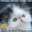

In [20]:
# Use IPython.display to open an image.
Image(os.path.join(original_cat_dir, '0042.png'), width=resize, height=resize)

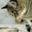

In [21]:
Image(os.path.join(original_cat_dir, '0179.png'), width=resize, height=resize)

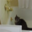

In [22]:
Image(os.path.join(original_cat_dir, '0027.png'), width=resize, height=resize)

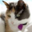

In [23]:
Image(os.path.join(original_cat_dir, '2852.png'), width=resize, height=resize)

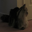

In [24]:
Image(os.path.join(original_cat_dir, '4999.png'), width=resize, height=resize)

### Analysis of Observations

* Even at 32x32 some images, like `2852.png`, the cat is easy to see and identify.
* The cat in `0027.png` is difficult to see. It's the dark shape, but without the context of the cat directory, it's not as obvious.

## 6) Base Model - DNN

To create a Dense Neural Network, I will be using [Keras](https://keras.io/api/). According to the Keras [documentation](https://keras.io/about/), 

> Keras is a deep learning API written in Python, running on top of the machine learning platform [TensorFlow](https://github.com/tensorflow/tensorflow).

It's advantages are that it's simple, flexible, and powerful.

Although Keras provides the ability to create a variety of neural networks, the DNN will be used for this project because this part is sort of a remix of the MNIST lab, where a DNN was trained with MNIST.

### Build the Base Model

Given this is a DNN, the image data needs to be reduced from 3 dimensions to 1. So, the first layer will flatten the images dimension values, `32x32x3` (32 pixels and 3 color ranges, RGB), to `3072`.

There will be 1 hidden layer with `512` activation nodes, which is the same as the MNIST lab.

The last layer will have `10` activation nodes, each of which represents 1 of the potential classes.

In [25]:
network = models.Sequential()
network.add(layers.Flatten(input_shape=(image_size, image_size, 3)))
network.add(layers.Dense(512, activation='relu', input_shape=(image_size, image_size, 3)))
network.add(layers.Dense(10, activation='softmax', input_shape=(512,)))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


### Compile the DNN

Given the final layer has 10 nodes, the loss will have to be `categorical_crossentropy`. As a way to understand how well the DNN trained, metrics will be set to `accuracy`. An optimizer of `1e-4` was chosen because the most labs in this class also had that optimizer.

In [26]:
optimizer = optimizers.RMSprop(lr=1e-4)

network.compile(optimizer=optimizer, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Fit the DNN

Using the `train_generator` perform `100` steps for `30` epochs. These values are the same as the MNIST lab, and to keep this project as sort of a remix of the lab, I've chosen to leave these the same.

Using the `validation_generator`, validate `50` steps. Again, the `50` was used in the MNIST lab.

----

Because this is the base model and a remix of the other labs, I've chosen to not adjust the steps or epoch values for the DNN and the CNN.

In [27]:
history = network.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 4s 14ms/step - loss: 2.2105 - accuracy: 0.1895 - val_loss: 2.0622 - val_accuracy: 0.2560
Epoch 2/30
100/100 [==============================] - 2s 16ms/step - loss: 2.0645 - accuracy: 0.2590 - val_loss: 2.0529 - val_accuracy: 0.2550
Epoch 3/30
100/100 [==============================] - 2s 15ms/step - loss: 2.0249 - accuracy: 0.2620 - val_loss: 2.0377 - val_accuracy: 0.2770
Epoch 4/30
100/100 [==============================] - 2s 15ms/step - loss: 2.0041 - accuracy: 0.2910 - val_loss: 2.1028 - val_accuracy: 0.2450
Epoch 5/30
100/100 [==============================] - 2s 15ms/step - loss: 1.9220 - accuracy: 0.3235 - val_loss: 1.9541 - val_accuracy: 0.2780
Epoch 6/30
100/100 [==============================] - 1s 13ms/step - loss: 1.9413 - accuracy: 0.3035 - val_loss: 1.8873 - val_accuracy: 0.3410
Epoch 7/30
100/100 [==============================] - 2s 15ms/step - loss: 1.9306 - accuracy: 0.2930 - val_loss: 1.9624 - val_accuracy: 0.2820

### Define the Display History Method

A decent amount of neural networks will be made in this project, and I want to know whether the training made some of the models overfit. So to reduce the number of times this code has to be written, a method was made.

In [28]:
def displayHistory(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

### Is the Model Overfit?

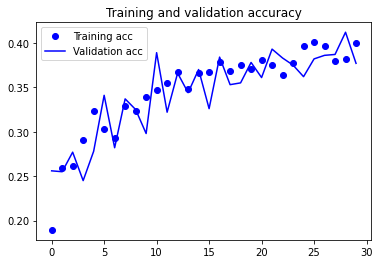

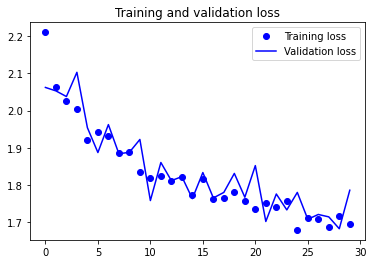

In [29]:
displayHistory(history)

Although the fitting accuracy is not high, the model does not appear to have overfitting. For accuracy and loss, the training and validation lines follow similar paths and remain close.

### Testing Accuracy

In [30]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

500/500 [==============================] - 4s 8ms/step - loss: 1.7502 - accuracy: 0.3730
Accuracy:  0.37299999594688416


Now that we know our base model can achieve 37.29%, let's see 

---

what a Convoluational Neural Network can achieve.

## 7) Convoluational Neural Network (CNN)

To create a Convoluational Neural Network, I will again be using [Keras](https://keras.io/api/).

Keras provides a `Conv2D` layer to make CNNs. According to the documentation for [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)


> 2D convolution layer (e.g. spatial convolution over images).
>
> This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs...

This makes the `Conv2D` perfect for this project's use case. The CIFAR-10 dataset contains images, and the convolution kernel helps to reduce the input size for the next layer. While `32x32x3` is not a large number, images with more pixels can start to produce high input layers and more convolution kernels will be needed to reduce each input layer's size.



### Instantiating Networks

A variety of networks will be instantiated, compiled, and fitted in the hopes of understanding how many hidden layers are needed.

In [31]:
# Create an array of possible hidden layer input counts.
layerCount = [256, 128, 64, 32, 16]

#### Define the CNN Methods

Very similar steps will be performed to test hidden layer node counts and dropout values. Therefore a series of method are defined here.

#### Build Convolutional Neural Net (buildConvnet)

Referencing the CNN_Cats_And_Dogs lab, each of the CNNs will have the same convolutional layers but only vary the hidden dense layer after flattening.

The convolutional layers will start off with `30x30x32`, reduce to `15x15x32`, drop 2 to make `13x13x64`, reduce to `6x6x64`, drop 2 to make `4x4x128`, and finally reduce to `2x2x128`. This essentially starts with a large input space and through convolutions reduces to a space of `512` (2 * 2 * 128 = 512). For this reason, the layerCount array does not start at `512`. Flattening after convolution, essentially creates the `512` hidden layer from the base model.

After flattening a hidden dense layer will be added. Its node count will vary based on the `input` parameter.

The last layer has 10 nodes; each of which corresponds to a different image class.

In [32]:
def buildConvnet(input):
  # Init convnet
  convnet = models.Sequential()

  # Add convnet layers according
  convnet.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
  convnet.add(layers.MaxPooling2D((2, 2)))
  convnet.add(layers.Conv2D(64, (3, 3), activation='relu'))
  convnet.add(layers.MaxPooling2D((2, 2)))
  convnet.add(layers.Conv2D(128, (3, 3), activation='relu'))
  convnet.add(layers.MaxPooling2D((2, 2)))

  # Flatten the layers.
  convnet.add(layers.Flatten())

  # Add dense layer.
  convnet.add(layers.Dense(input, activation='relu'))

  # Add activation layer.
  convnet.add(layers.Dense(10, activation='softmax'))

  return convnet

#### Build Convolutional Neural Net with Dropout (buildConvnetWithDropout)

This method is very similar to `buildConvnet` expect that there's a Dropout layer after the hidden layer. Sometimes dropping a certain percentage can improve learning. Each of the CNNs with Dropout will have the same rate, `0.2`. It was chosen because lower values (but not too low) for dropout rates tend to yield better results.

In [33]:
def buildConvnetWithDropout(input):
  # Init convnet
  convnet = models.Sequential()

  # Add convnet layers according
  convnet.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
  convnet.add(layers.MaxPooling2D((2, 2)))
  convnet.add(layers.Conv2D(64, (3, 3), activation='relu'))
  convnet.add(layers.MaxPooling2D((2, 2)))
  convnet.add(layers.Conv2D(128, (3, 3), activation='relu'))
  convnet.add(layers.MaxPooling2D((2, 2)))

  # Flatten the layers.
  convnet.add(layers.Flatten())

  # Add dense layer.
  convnet.add(layers.Dense(input, activation='relu'))
  convnet.add(layers.Dropout(0.2))

  # Add activation layer.
  convnet.add(layers.Dense(10, activation='softmax'))

  return convnet

### Build the CNNs with Only Hidden Layers

In [34]:
convnet_256 = buildConvnet(layerCount[0])
convnet_128 = buildConvnet(layerCount[1])
convnet_64 = buildConvnet(layerCount[2])
convnet_32 = buildConvnet(layerCount[3])
convnet_16 = buildConvnet(layerCount[4])

### Builds the CNNs with Hidden and Dropout Layers

In [35]:
convnet_drop_256 = buildConvnetWithDropout(layerCount[0])
convnet_drop_128 = buildConvnetWithDropout(layerCount[1])
convnet_drop_64 = buildConvnetWithDropout(layerCount[2])
convnet_drop_32 = buildConvnetWithDropout(layerCount[3])
convnet_drop_16 = buildConvnetWithDropout(layerCount[4])

### CNN Summaries

Because the models are mostly the same, I've chosen to only display a few summaries here. These will hopefully provide some explaination about each of the models schemas.

In [36]:
convnet_256.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)       

In [37]:
convnet_128.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [38]:
convnet_drop_32.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2, 128)       

In [39]:
convnet_drop_16.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 2, 2, 128)      

### Define Compile Convent (compileConvnet)

The arguments are the same as the DNN base model to keep comparisons similar.

In [40]:
def compileConvnet(convnet):
  convnet.compile(optimizer=optimizer, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

### Compile the networks

In [41]:
compileConvnet(convnet_256)
compileConvnet(convnet_128)
compileConvnet(convnet_64)
compileConvnet(convnet_32)
compileConvnet(convnet_16)

In [42]:
compileConvnet(convnet_drop_256)
compileConvnet(convnet_drop_128)
compileConvnet(convnet_drop_64)
compileConvnet(convnet_drop_32)
compileConvnet(convnet_drop_16)

### Define the Fitting Method

The hyperparameters for steps and epochs will stay the same to compare against the DNN.

In [43]:
def convnetFit(convnet):
  return convnet.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)

#### Fit the Only Hidden Layer Convnets

Having all of the fits in one block causes the runtime to crash. So I've split them up into smaller blocks.

In [44]:
history_convnet_256 = convnetFit(convnet_256)
history_convnet_128 = convnetFit(convnet_128)

Epoch 1/30
100/100 [==============================] - 8s 17ms/step - loss: 2.2911 - accuracy: 0.1285 - val_loss: 2.2748 - val_accuracy: 0.1550
Epoch 2/30
100/100 [==============================] - 1s 14ms/step - loss: 2.2403 - accuracy: 0.1875 - val_loss: 2.1968 - val_accuracy: 0.2370
Epoch 3/30
100/100 [==============================] - 2s 16ms/step - loss: 2.1418 - accuracy: 0.2330 - val_loss: 2.0964 - val_accuracy: 0.2390
Epoch 4/30
100/100 [==============================] - 2s 16ms/step - loss: 2.0707 - accuracy: 0.2380 - val_loss: 2.0274 - val_accuracy: 0.2630
Epoch 5/30
100/100 [==============================] - 1s 14ms/step - loss: 2.0035 - accuracy: 0.2840 - val_loss: 1.9624 - val_accuracy: 0.2990
Epoch 6/30
100/100 [==============================] - 1s 14ms/step - loss: 1.9488 - accuracy: 0.2835 - val_loss: 1.9415 - val_accuracy: 0.2950
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 1.8820 - accuracy: 0.3255 - val_loss: 1.9812 - val_accuracy: 0.2450

In [45]:
history_convnet_64 = convnetFit(convnet_64)
history_convnet_32 = convnetFit(convnet_32)

Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 2.2965 - accuracy: 0.1160 - val_loss: 2.2841 - val_accuracy: 0.1500
Epoch 2/30
100/100 [==============================] - 2s 16ms/step - loss: 2.2501 - accuracy: 0.1870 - val_loss: 2.2169 - val_accuracy: 0.1880
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 2.1883 - accuracy: 0.2165 - val_loss: 2.1488 - val_accuracy: 0.2210
Epoch 4/30
100/100 [==============================] - 1s 13ms/step - loss: 2.1095 - accuracy: 0.2335 - val_loss: 2.0749 - val_accuracy: 0.2510
Epoch 5/30
100/100 [==============================] - 1s 14ms/step - loss: 2.0436 - accuracy: 0.2485 - val_loss: 1.9984 - val_accuracy: 0.2620
Epoch 6/30
100/100 [==============================] - 1s 13ms/step - loss: 1.9908 - accuracy: 0.2805 - val_loss: 1.9871 - val_accuracy: 0.2730
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 1.9344 - accuracy: 0.2960 - val_loss: 1.9197 - val_accuracy: 0.2880

In [46]:
history_convnet_16 = convnetFit(convnet_16)

Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 2.2979 - accuracy: 0.1115 - val_loss: 2.2948 - val_accuracy: 0.1110
Epoch 2/30
100/100 [==============================] - 1s 14ms/step - loss: 2.2863 - accuracy: 0.1195 - val_loss: 2.2696 - val_accuracy: 0.1320
Epoch 3/30
100/100 [==============================] - 2s 16ms/step - loss: 2.2711 - accuracy: 0.1460 - val_loss: 2.2709 - val_accuracy: 0.1350
Epoch 4/30
100/100 [==============================] - 1s 13ms/step - loss: 2.2539 - accuracy: 0.1570 - val_loss: 2.2470 - val_accuracy: 0.1610
Epoch 5/30
100/100 [==============================] - 2s 16ms/step - loss: 2.2298 - accuracy: 0.1885 - val_loss: 2.2277 - val_accuracy: 0.2050
Epoch 6/30
100/100 [==============================] - 2s 16ms/step - loss: 2.1911 - accuracy: 0.2070 - val_loss: 2.1886 - val_accuracy: 0.1950
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 2.1845 - accuracy: 0.2125 - val_loss: 2.1619 - val_accuracy: 0.2300

#### Fit the Hidden Layer and Dropout Convnets

In [47]:
history_convnet_drop_256 = convnetFit(convnet_drop_256)
history_convnet_drop_128 = convnetFit(convnet_drop_128)

Epoch 1/30
100/100 [==============================] - 2s 17ms/step - loss: 2.2835 - accuracy: 0.1385 - val_loss: 2.2487 - val_accuracy: 0.2250
Epoch 2/30
100/100 [==============================] - 1s 13ms/step - loss: 2.1990 - accuracy: 0.2070 - val_loss: 2.1455 - val_accuracy: 0.2310
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 2.1032 - accuracy: 0.2270 - val_loss: 2.0474 - val_accuracy: 0.2400
Epoch 4/30
100/100 [==============================] - 1s 14ms/step - loss: 2.0312 - accuracy: 0.2565 - val_loss: 2.0017 - val_accuracy: 0.2490
Epoch 5/30
100/100 [==============================] - 1s 14ms/step - loss: 1.9890 - accuracy: 0.2660 - val_loss: 1.9111 - val_accuracy: 0.3040
Epoch 6/30
100/100 [==============================] - 2s 16ms/step - loss: 1.9392 - accuracy: 0.2880 - val_loss: 1.8942 - val_accuracy: 0.3250
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 1.8711 - accuracy: 0.3045 - val_loss: 1.8568 - val_accuracy: 0.3070

In [48]:
history_convnet_drop_64 = convnetFit(convnet_drop_64)
history_convnet_drop_32 = convnetFit(convnet_drop_32)

Epoch 1/30
100/100 [==============================] - 3s 17ms/step - loss: 2.2971 - accuracy: 0.1225 - val_loss: 2.2916 - val_accuracy: 0.1570
Epoch 2/30
100/100 [==============================] - 2s 16ms/step - loss: 2.2836 - accuracy: 0.1560 - val_loss: 2.2673 - val_accuracy: 0.1670
Epoch 3/30
100/100 [==============================] - 2s 16ms/step - loss: 2.2566 - accuracy: 0.1660 - val_loss: 2.2407 - val_accuracy: 0.1590
Epoch 4/30
100/100 [==============================] - 2s 16ms/step - loss: 2.2139 - accuracy: 0.2105 - val_loss: 2.1842 - val_accuracy: 0.2390
Epoch 5/30
100/100 [==============================] - 2s 16ms/step - loss: 2.1406 - accuracy: 0.2215 - val_loss: 2.1091 - val_accuracy: 0.2630
Epoch 6/30
100/100 [==============================] - 2s 16ms/step - loss: 2.0869 - accuracy: 0.2470 - val_loss: 2.0357 - val_accuracy: 0.2710
Epoch 7/30
100/100 [==============================] - 1s 13ms/step - loss: 2.0609 - accuracy: 0.2400 - val_loss: 1.9947 - val_accuracy: 0.2960

In [49]:
history_convnet_drop_16 = convnetFit(convnet_drop_16)

Epoch 1/30
100/100 [==============================] - 2s 15ms/step - loss: 2.2902 - accuracy: 0.1370 - val_loss: 2.2826 - val_accuracy: 0.1910
Epoch 2/30
100/100 [==============================] - 1s 13ms/step - loss: 2.2764 - accuracy: 0.1355 - val_loss: 2.2606 - val_accuracy: 0.1330
Epoch 3/30
100/100 [==============================] - 2s 16ms/step - loss: 2.2484 - accuracy: 0.1455 - val_loss: 2.2191 - val_accuracy: 0.2010
Epoch 4/30
100/100 [==============================] - 1s 14ms/step - loss: 2.2253 - accuracy: 0.1765 - val_loss: 2.1994 - val_accuracy: 0.1780
Epoch 5/30
100/100 [==============================] - 2s 16ms/step - loss: 2.1968 - accuracy: 0.1830 - val_loss: 2.1816 - val_accuracy: 0.2130
Epoch 6/30
100/100 [==============================] - 2s 16ms/step - loss: 2.1853 - accuracy: 0.1830 - val_loss: 2.1490 - val_accuracy: 0.2360
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 2.1683 - accuracy: 0.1965 - val_loss: 2.1274 - val_accuracy: 0.2200

### Overfitting

Again, there are a decent amount of CNNs fitted and displaying all of their history graphs would be a bit tedious and repetitive. Therefore, we'll look at the histories of the CNNs whose summaries we looked at earlier.

#### Hsitory of Only Hidden Layer Convnets

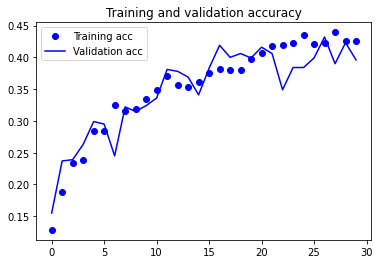

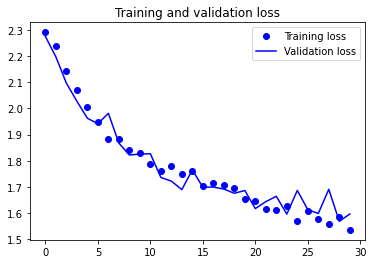

In [50]:
displayHistory(history_convnet_256)

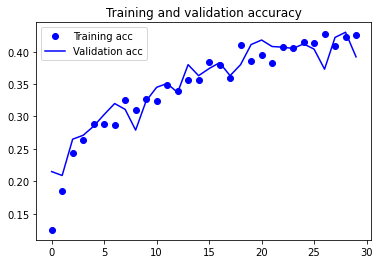

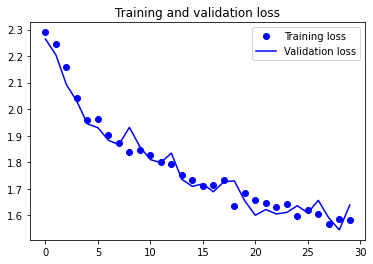

In [51]:
displayHistory(history_convnet_128)

Although the training and validation lines do not follow the same path, they seem to have the same distance between them. So there might be some overfitting, but it does not seem like enough to call it overfit.

#### History of Hidden and Dropout Layer Convnets

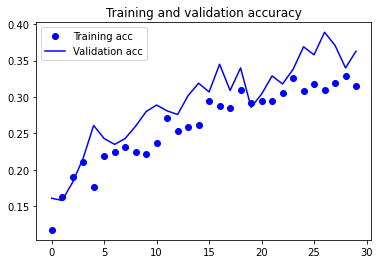

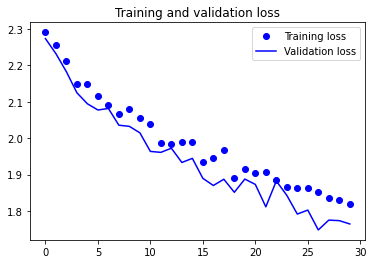

In [52]:
displayHistory(history_convnet_drop_32)

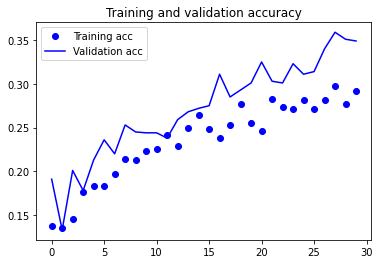

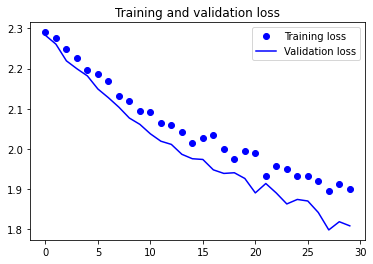

In [53]:
displayHistory(history_convnet_drop_16)

The training and validation lines seem to follow very similar path until about the 10th epoch. Simiar to the only hidden layer histories, the training does not appear to have made an model that's overfit.

### Accuracy of Networks

#### Define the Method to Evaluate the CNNs (evaluateConvnet)

Again, the same steps will be repeated with each CNN, so a method was defined to run evaluations within a block.

In [54]:
def evaluateConvnet(convnet, name):
  scoreSeg = convnet.evaluate(test_generator)
  print(name, "Accuracy: ", scoreSeg[1])
  print() # print a new line to separate the outputs

#### Only Hidden Layer Convnets

In [55]:
evaluateConvnet(convnet_256, '256')
evaluateConvnet(convnet_128, '128')

500/500 [==============================] - 4s 9ms/step - loss: 1.5955 - accuracy: 0.4199
256 Accuracy:  0.41990000009536743

500/500 [==============================] - 4s 8ms/step - loss: 1.5799 - accuracy: 0.4252
128 Accuracy:  0.4251999855041504



In [56]:
evaluateConvnet(convnet_64, '64')
evaluateConvnet(convnet_32, '32')
evaluateConvnet(convnet_16, '16')

500/500 [==============================] - 4s 8ms/step - loss: 1.6176 - accuracy: 0.4134
64 Accuracy:  0.41339999437332153

500/500 [==============================] - 4s 8ms/step - loss: 1.6532 - accuracy: 0.4029
32 Accuracy:  0.40290001034736633

500/500 [==============================] - 4s 9ms/step - loss: 1.7045 - accuracy: 0.3901
16 Accuracy:  0.39010000228881836



#### Drop Convnet

In [57]:
evaluateConvnet(convnet_drop_256, '256')
evaluateConvnet(convnet_drop_128, '128')

500/500 [==============================] - 5s 10ms/step - loss: 1.5212 - accuracy: 0.4493
256 Accuracy:  0.44929999113082886

500/500 [==============================] - 4s 9ms/step - loss: 1.5622 - accuracy: 0.4366
128 Accuracy:  0.436599999666214



In [58]:
evaluateConvnet(convnet_drop_64, '64')
evaluateConvnet(convnet_drop_32, '32')
evaluateConvnet(convnet_drop_16, '16')

500/500 [==============================] - 4s 8ms/step - loss: 1.5918 - accuracy: 0.4302
64 Accuracy:  0.4302000105381012

500/500 [==============================] - 4s 8ms/step - loss: 1.7348 - accuracy: 0.3660
32 Accuracy:  0.3659999966621399

500/500 [==============================] - 4s 8ms/step - loss: 1.8138 - accuracy: 0.3412
16 Accuracy:  0.34119999408721924



## 8) Conclusion

So, a CNN does perform better than a DNN with images. The improvent is quite a bit, too. An accuracy improvement of `0.05219`.

The CNN with a hidden layer of 128 seemed to have to the best performance with `0.4251999855041504`. So smaller hidden layer inputs are not ideal after performing convolutions.

The dropout layer did not seem to provide any performance boost. They actually seemed to have the exact opposite effect; the scores were worst.

### Summary of Scores

| Classifier      | Score | Score with Dropout |
| ----------- | ----------- | ----------- |
| Base DNN      | 0.37299999594688416       | n/a |
| CNN 256   | 0.41990000009536743        | 0.44929999113082886 |
| CNN 128   | 0.4251999855041504       | 0.436599999666214 |
| CNN 64   | 0.41339999437332153        | 0.4302000105381012 |
| CNN 32   | 0.40290001034736633        | 0.3659999966621399 |
| CNN 16   | 0.39010000228881836        | 0.34119999408721924 |